# 노드 투 벡터(Node to Vector)

## node2vec 라이브러리 설치

In [ ]:
!pip install node2vec

## 실행

Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 200.43it/s]


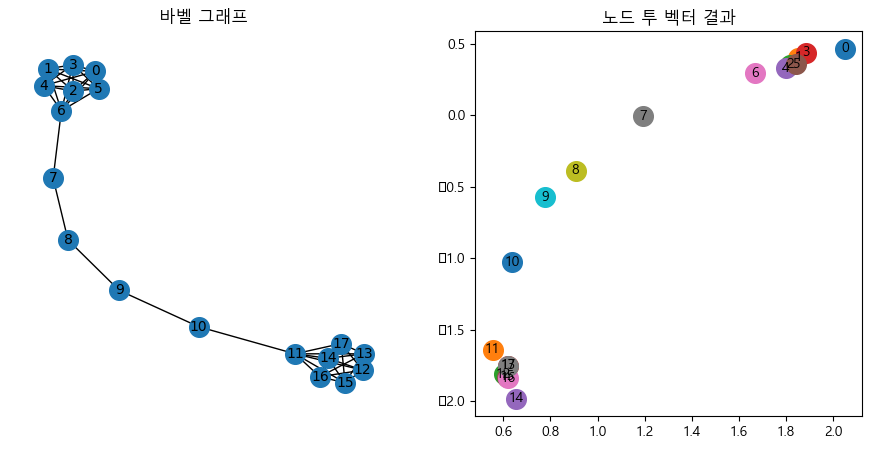

In [23]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")


G = nx.barbell_graph(m1=7, m2=4)  # 바벨 그래프(Barbell graph) 생성
encoder = Node2Vec(G, dimensions=2).fit(window=10)  # 2차원 노드 임베딩(Node-level embedding) 알고리즘

fig, subs = plt.subplots(ncols=2, figsize=(11, 5))

nx.draw(G, with_labels=True, font_size=10, node_size=200, ax=subs[0])  # 바벨 그래프 시각화
subs[0].set_title("바벨 그래프")

for x in G.nodes():
    name = str(x)
    V = encoder.wv.get_vector(name)
    v0, v1 = V[0], V[1]
    
    subs[1].scatter(v0, v1, s=200)
    subs[1].annotate(name, (v0, v1), fontsize=10, ha="center", va="center")
subs[1].set_title("노드 투 벡터 결과")

plt.show()